# Знакомство со средой

In [24]:
from typing import *
import gymnasium as gym
import torch
import matplotlib.pyplot as plt

In [30]:
env = gym.make("ALE/Assault-ram-v5", render_mode="rgb_array")

In [5]:
env.action_space

Discrete(7)

In [8]:
env.observation_space

Box(0, 255, (128,), uint8)

In [33]:
env.reset()

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 254,
          0,   0,   0,   6, 100, 100, 100,   0,   0,   0,   0,  88, 254,
          0,   0, 192,   0, 136, 252,   2,   2,   2,   2, 130, 130, 130,
          6, 188, 255,   0,  25,   0, 253,   0, 253, 128,  64, 128, 128,
         64, 128,   0,   0,   0,   0,   0,   0,   0,   0,  16,  16,   0,
        253,   0, 127, 115, 100,  64,  19,  24,   0, 253,   0,   0,   0,
          0,   0,   2, 130,   0, 254,   0, 254,   0, 254,   0, 254,   0,
        254, 144,  60,   0,   0,   0,   0,   0,  80, 254,   4, 206,  68,
          0,  10,   0,   4,   0,   0, 255, 248,   0,   0,  64,   0, 172,
          0,   0,   0,  15, 252, 157, 251,  64, 251, 112, 243], dtype=uint8),
 {'lives': 4, 'episode_frame_number': 0, 'frame_number': 0})

In [34]:
env.step(env.action_space.sample())

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 254,
          0,   0,   0, 102, 100, 100, 100,   0, 198,   0,   0,   0, 253,
          0,   0, 192,   0, 136, 252,   2,  66, 194,  66, 194,  51, 194,
          6, 188, 255,   0,  25,   0, 253,   0, 253, 128,  64, 128, 128,
         64, 128,   0,   0,   0,   0,   0,   0,  28,  28,  17,  17,   0,
        253,   0, 127,  51,  36,  64,  19,  24,   0, 253,   0,   0,   0,
          0,   0,  66, 194,   0, 254,   0, 254,   0, 254,   0, 254,   0,
        254,  96,  97,   0,   0,   0,   0,   0,  80, 254,   4, 145,  72,
          0,  10,   0,   8,   0,   0, 255, 248,   0,   0,  64,   0, 154,
          0,   0,   0, 248, 251,  15, 252, 248, 251, 188, 247], dtype=uint8),
 0.0,
 False,
 False,
 {'lives': 4, 'episode_frame_number': 4, 'frame_number': 4})

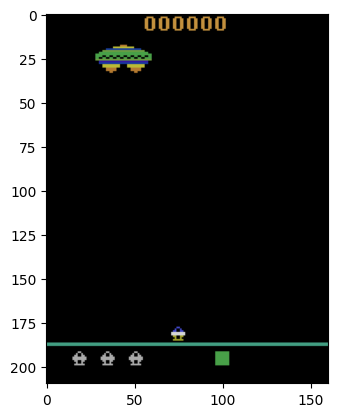

In [35]:
plt.imshow(env.render())

In [25]:
def eps_greedy_policy(n_action: int, eps: float, Q: Any) -> float:
    probabilities = torch.ones(n_action) * eps / n_action
    best_action = torch.argmax(Q).item()
    probabilities[best_action] += 1 - eps
    return torch.multinomial(torch.ones(len(probabilities)), 1).item()